<a href="https://colab.research.google.com/github/ricardophg1/ricardophg1/blob/main/Estudo_Recursos_Humano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo em relação ao Departamento de Recursos Humano (*Ciência de Dados Aplicada para Négocios*)
---




## Bibliotecas e base de dados utilizadas para estudo de caso
**Fonte:**
* Bade dados Kaggle/IBM: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
* Fonte calculo de salário: https://www.mom.gov.sg/employment-practices/salary/monthly-and-daily-salary and https://sprout.zendesk.com/hc/en-us/articles/360030922133-How-to-Calculate-for-the-Daily-Rate-from-Your-Monthly-Salary
* Stock: https://www.moneyunder30.com/employee-stock-options#~text=Typically%20they%20are%20granted%20to.a%20specific%20of%20time

**Nota:** *Base de dados construida com informações do exterior*

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_employee = pd.read_csv('/content/Human_Resources.csv')

In [3]:
# Confirmando a quantidade de linhas e colunas do DF
df_employee.shape

(1470, 35)

In [4]:
# Listando o DF e confirmando os dados comuns entre as empresas
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Buscando informações adicionais sobre as colunas
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                



```
Neste pesquisa vemos um bom resultado sobre os dados. 
O "non-null" nos indica que esta base de dados que esta sendo consumida,
não tem nenhuma dado fatante.
```



In [6]:
# Pesquisando as estatísticas para cada um destes atributos
df_employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000




```
Nesta pesquisa estatística temos:
*   Quantidade
*   A média da idade dos funcionários
*   STD (desfio padrão)
*   A idade do funcionário mais novo
*   25%, 50% e 75% (quartil/idade)
*   A idade do funcionário mais velho
```



## Visualização dos Dados

In [7]:
# Realizando a conversão dos dados para análises (coluna Attrition)
# Valores Yes passam a valer 1 e valores No passam a valerem 0 (coluna Attrition)
df_employee['Attrition'] = df_employee['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
df_employee['OverTime'] = df_employee['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df_employee['Over18'] = df_employee['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

### Limpeza dos dados

In [9]:
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


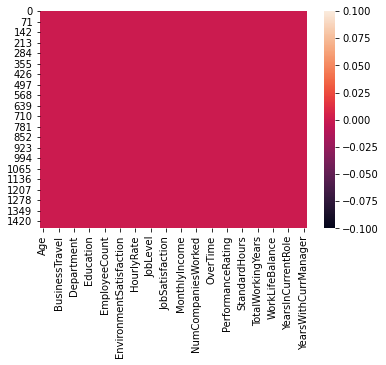

In [10]:
# Conferindo que não há valores nulos na base de dados por meio do mapa de calor
sns.heatmap(df_employee.isnull());

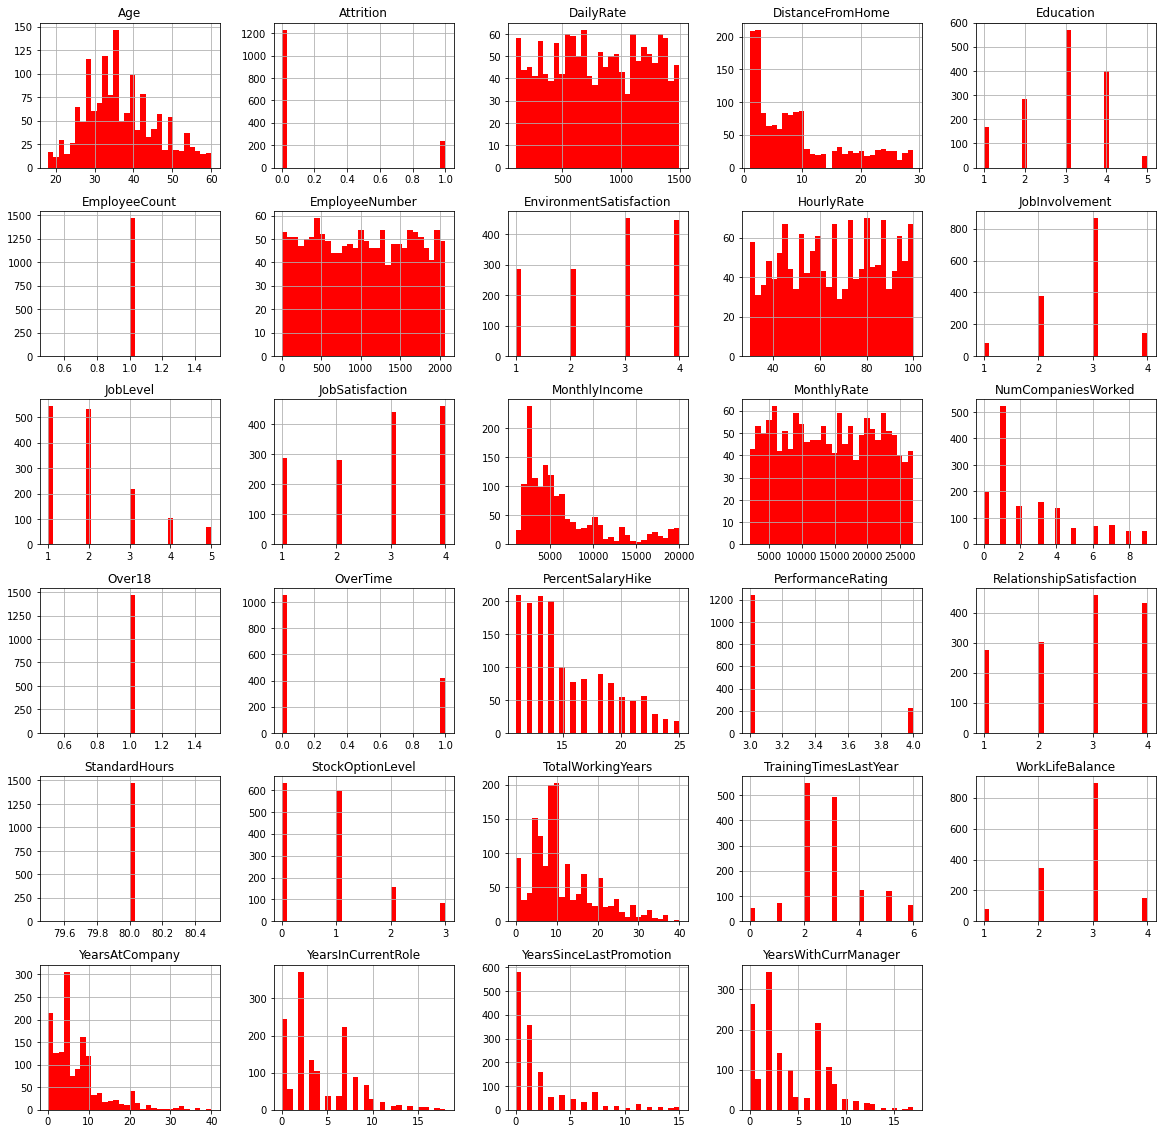

In [11]:
# Gerando um histograma para cada um dos dados para obtenção de insigths
df_employee.hist(bins=30, figsize=(20,20), color='r');

In [12]:
# Apagando as colunas que não serão trabalhadas
df_employee.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [13]:
# Confirmando a tabela com os dados a serem trabalhados e a quantidade de colunas e linhas existentes
df_employee.head(), df_employee.shape

(   Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
 0   41          1  ...                       0                     5
 1   49          0  ...                       1                     7
 2   37          1  ...                       0                     0
 3   33          0  ...                       3                     0
 4   27          0  ...                       2                     2
 
 [5 rows x 31 columns], (1470, 31))

### Divisão do Data Frame principal

In [14]:
# Subdividindo o data frame central em duas bases DF, 
# O objetivo é obter as estatísticas de quem e quem permaneceu na empresa
df_left = df_employee[df_employee['Attrition'] == 1] # DF para pessoas que sairam
df_stayed = df_employee[df_employee['Attrition'] == 0] # DF para pessoas que ficaram



```
Com a criação dos dois data frame (saída e permanencia), inicia-se o estudo estatístico para obtenção dos resoltados.
```



In [15]:
print('Total = ', len(df_employee))
print('Número de funcionários que saíram da empresa = ', len(df_left))
print('Porcentagem de funcionários que saíram da empresa = ', (len(df_left) / len(df_employee)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(df_stayed))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(df_stayed) / len(df_employee)) * 100)

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


In [16]:
df_left.describe() # verificando as estatísticas somente dos que saíram

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [17]:
df_stayed.describe() # verificando as estatísticas somente dos que ficaram

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000




```
Com as análises estatísticas acima, podemos fazer um comparativo e verificar que:
*   A média dos que saem é de 33% e dos que ficam é de 37%
  *   Validamos uma ideia de que as pessoas mais novas tem a maior tendência em sair da empresa.
  *   Validamos uma ideia de que as pessoas que permanecem são as que possuem maior salário.
    *   Neste ponto podemos interpretar que as pessoas que mais saem, buscam um trabalho com objetivos de maiores salários.
  *   Validamos uma ideia de que as pessoas que mais saem, são aqueles que moram mais longe da empresa.
  *   Validamos uma ideia de que as pessoas que mais saem da empresa, são aquelas que estão insatisfeitas com algo na empresa.
  *   Validamos uma ideia de que as pessoas que mais saem da empresa, são aquelas que possuem um nível de escolaridade mais baixa quanto aqueles que permanecem.
      Assim, podemos interpretar que os maiores salários estão destinados para aqueles que maior nível escolar pussir.

**Obs.: Com estes e alguns insights mais que se podem extrair, podemos considerar a hipóteses da empresa estimular os funcionários 
jovens a seguirem com seus estudos, os insentivando com bolsas estudantis, bonificação por alcance e maior salário em uma 
eventual promoção. Com tudo, considerando a permanencia do funcionário na empresa por um tempo mais prolongado e reduzindo os 
gastos caros em novas contratações e treinamentos de funcionários para suprir as vagas.**
```

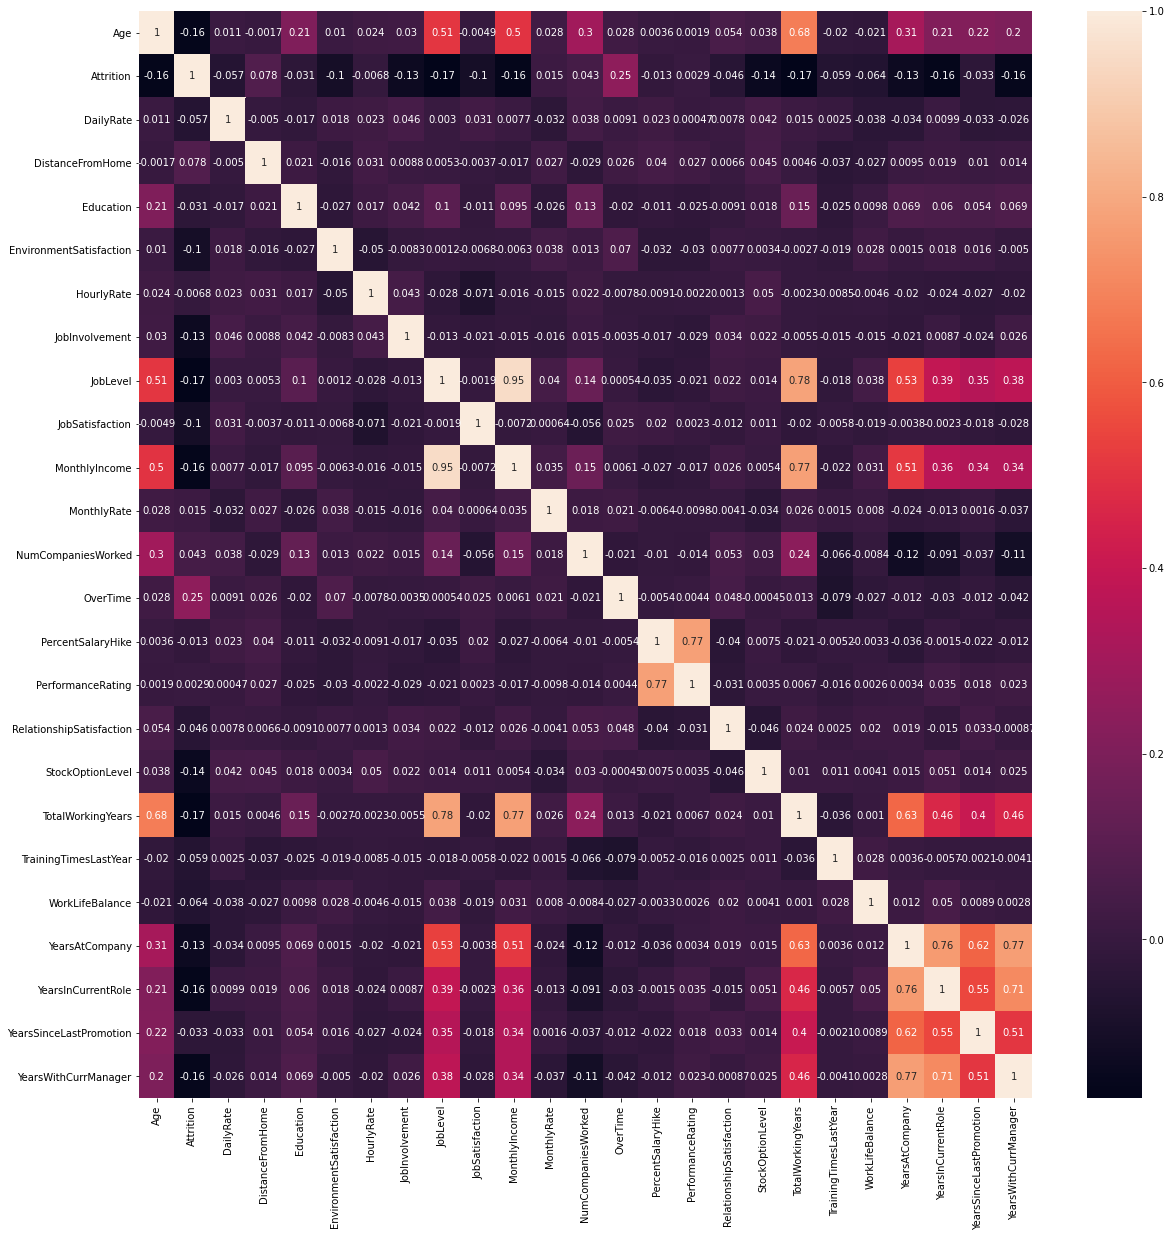

In [120]:
# Criando um cálculo estatístico (matemático) para avaliar quanto um dado irá correlacionar com o outro
correlations = df_employee.corr()
f, ax = plt.subplots(figsize = (20, 20)) # chamando a representação comparativa em um gráfico
sns.heatmap(correlations, annot=True);

**Neste incrível gráficos podemos observar as correlações**
*Note: Quanto mais próximo de 1, mais os dados estão correlacionados*
```
*   Oberva-se um 0.78 na linha JobLevel com a coluna TotalWorkingYears
  *   indica que o cargo que a pessoa tem (JobLevel), está relacionado com
      os anos que tem de empresa (TotalWorkingYears).
  *   faz o sentido de quanto mais tempo a pessoal está trabalhando na empresa,
      mais chances ela tem de atingir outros níveis de trabalho.
*   Observa-se um 0.68 na linha Age com a coluna TotalWorkingYears
  *   é uma correlação lógica pois, quanto mais anos a pessoas esta trabalhando
      na empresa, maior é a idade dela.
*   Observa-se 0.77 na linha PercentSalaryHike com a coluna PerformanceRating (correlação forte)
  *   esta correlação se dá pela nota que o RH atribui ao funcionário e que dado
      uma melhor performance, maior é o salário atribuido a esta pessoa.
*   Observa-se 0.77 na linha TotalWorkingYears com MonthlyIncone (correlação forte)
  *   quanto mais anos a pessoa trabalhou na empresa, por consequẽncia os salátios
      são maiores.
*   Observa-se 0.25 na linha OverTime com a coluna Attrition uma correlação fraca
  *   os funcionários não deixam a empresa por terem de fazer horas extras.

Obs.: Com esta matriz de correlação, pode-se sacar mais insigths para maiores conclusóes em relação a empresa.
```



### Representações em gráficos

Abaixo serão exibidos alguns gráficos de contagem

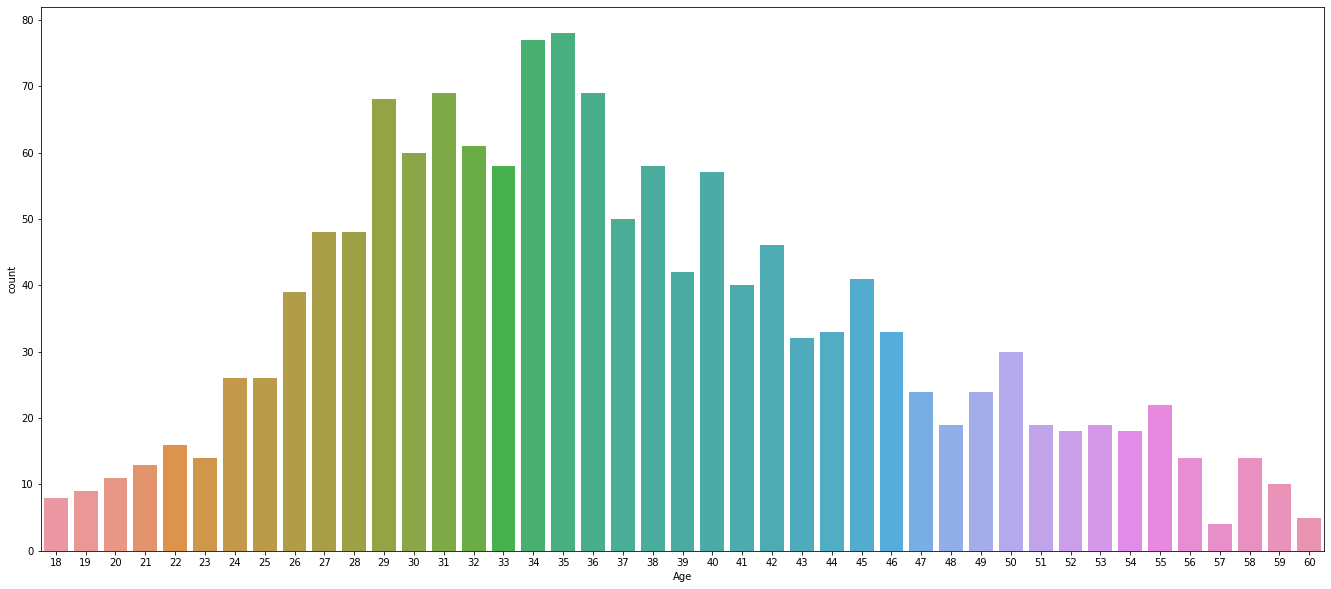

In [19]:
# Juntando os dados para exploração em gráfico
plt.figure(figsize=[23,10])
sns.countplot(x = 'Age', data=df_employee);

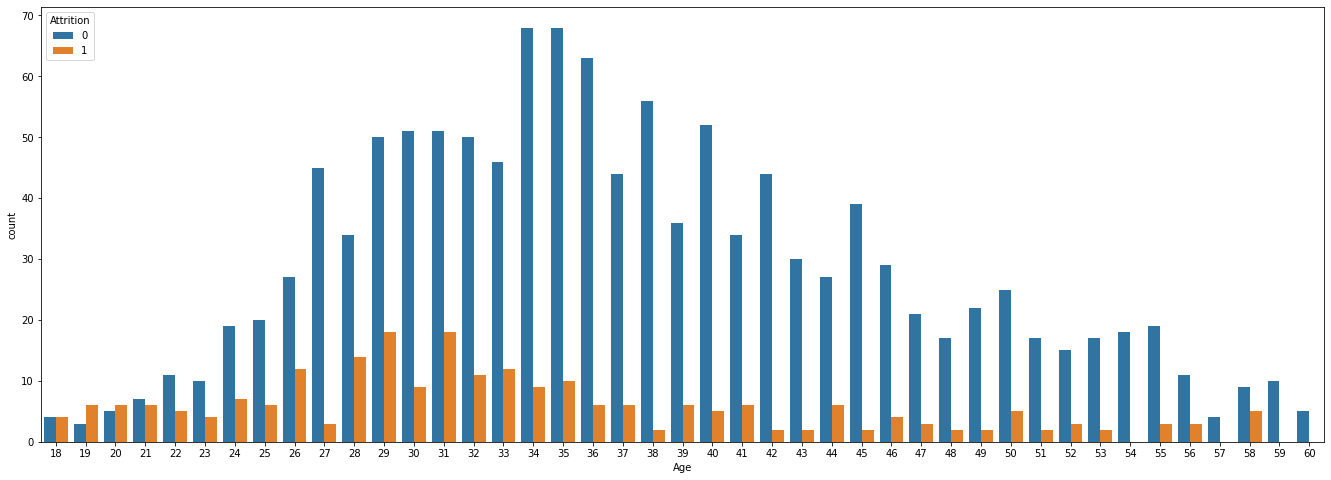

In [20]:
# Apresentando pessoas com tendências a saírem da empresa e as que não
plt.figure(figsize=[23,8])
sns.countplot(x = 'Age', hue = 'Attrition', data=df_employee);



```
Observamos no gráfico acima:
 A tendência de saída dos jovens entre 18 e 21 anos é muito grande.
 A partir dos 28 aos 33 anos, a saída da empresa já diminui e a tendência a estabilização aumenta.
 A partir dos 38 anos é uma parcela muito pequena para os que saem e a partir dai, a permanencia
 na empresa aumenta ainda mais para um curto espaço de tempo.

Nota: A impresa pode interpretar que quanto maior a idade da pessoal, mais segurança eles poderam ter na permanencia do funcionário por uma busca estável da vaga de trabalho.
```



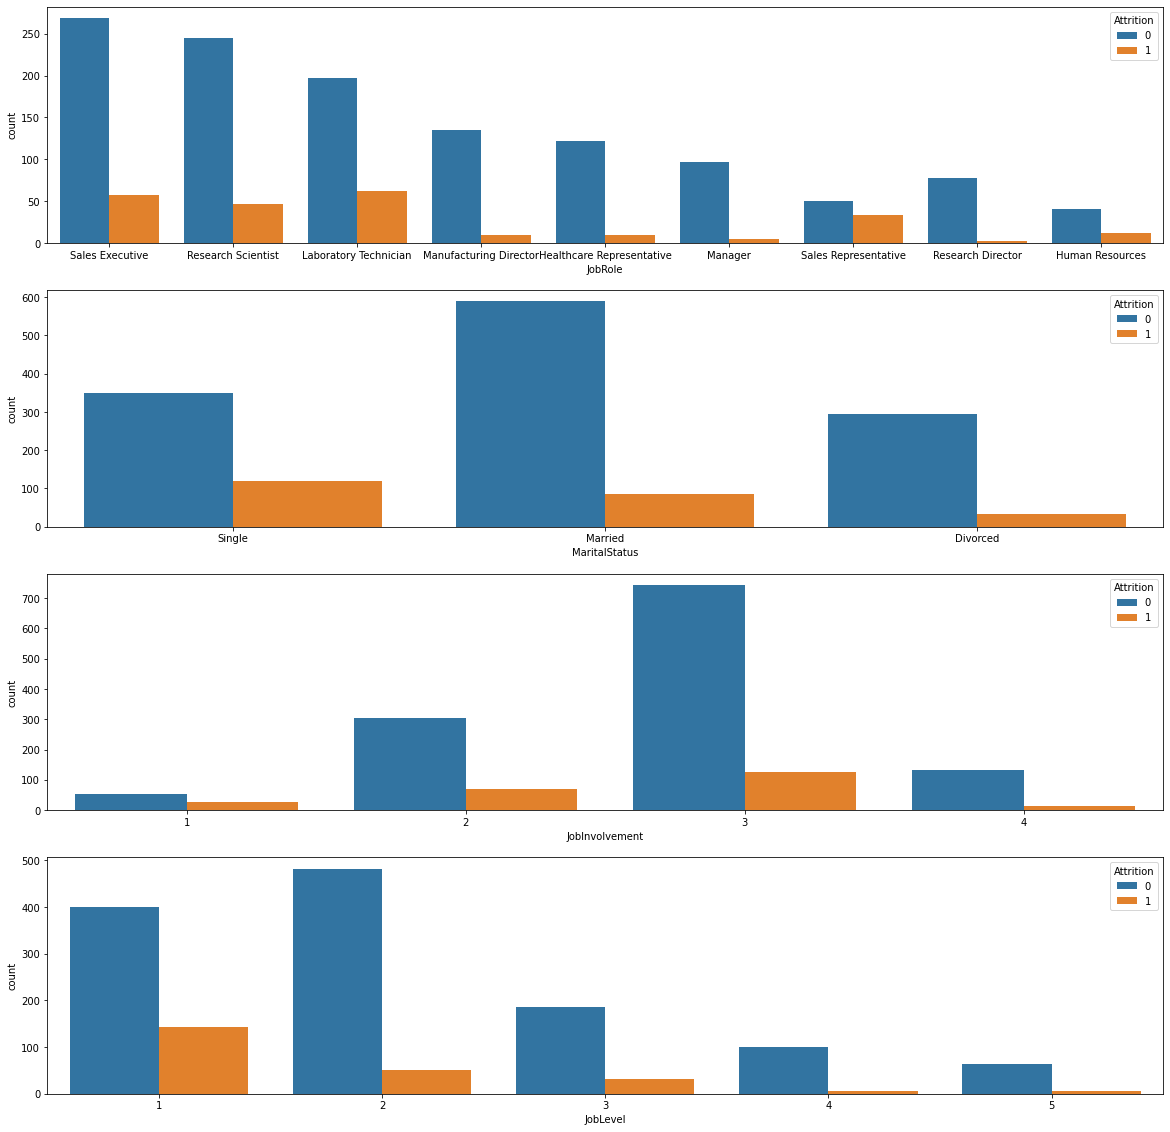

In [21]:
plt.figure(figsize=[20,20])
plt.subplot(411) # 4 (quantidade de linah), 1 (coluna), 1 (gráfico)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df_employee)
plt.subplot(412) # 4 (quantidade de linah), 2 (coluna), 1 (gráfico)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df_employee)
plt.subplot(413) # 4 (quantidade de linah), 3 (coluna), 1 (gráfico)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df_employee)
plt.subplot(414) # 4 (quantidade de linah), 4 (coluna), 1 (gráfico)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df_employee)



```
Com este gráfico acima, observamos que:
  As pessoas que mais saem são profissionais Representantes de Vendas, tendo atenção também para os Tecnicos de Laboratório.
  *   Para não ter muitas voltas, a empresa pode concentrar seus esforços no departamento 
      de Vendas para não seguir perdendo funcionários, sendo possível uma criação de um novo DF para exploração de análises ao 
      departamento. Com relação ao estado civil, os solteiros são os que mais saem da empresa.
  Com relação a pontuação dada pelo RH em base de pesquisa, os que mais saem da empresa são aqueles com pontuação 3 em nível de
  relacionamento com o trabalho.
  Com relação ao JobLevel as pessoas com maior pontuação são as que tem os melhores cargos.
```



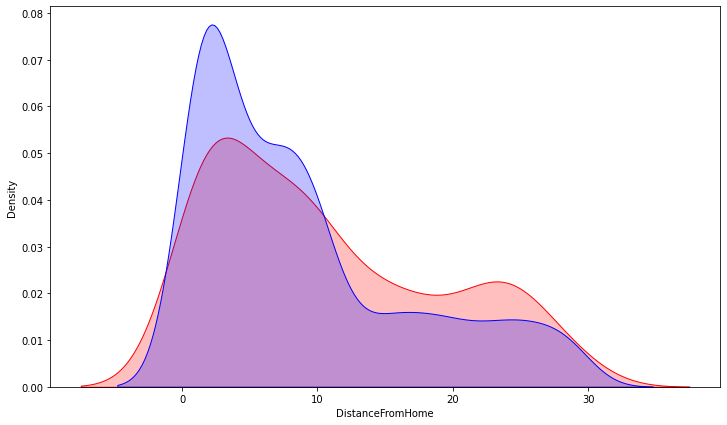

In [22]:
# KDE (Kernel Density Estimate)
# Análises gráfica para aqueles que saem e para aqueles que permanecem na empresa
plt.figure(figsize=(12,7))
sns.kdeplot(df_left['DistanceFromHome'], label = 'Funcionários que saíram', shade=True, color='r');
sns.kdeplot(df_stayed['DistanceFromHome'], label = 'Funcionários que permanecem', shade=True, color='b');

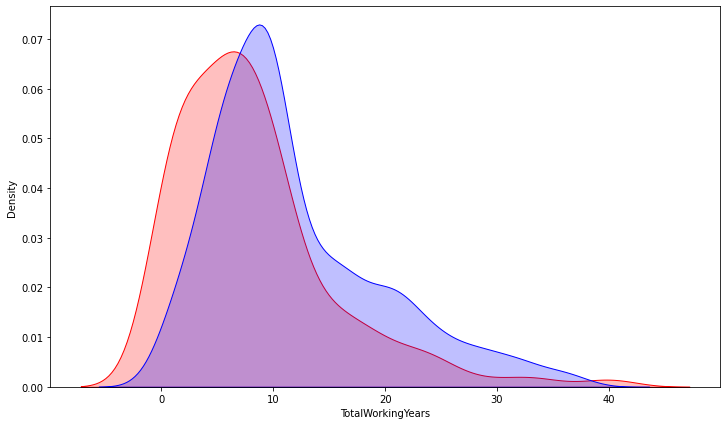

In [23]:
# Análises gráfica para o total de anos entre os que saem e os que permanecem
# na empresa
plt.figure(figsize=(12,7))
sns.kdeplot(df_left['TotalWorkingYears'], label = 'Funcionários que saíram', shade=True, color='r');
sns.kdeplot(df_stayed['TotalWorkingYears'], label = 'Funcionários que permanecem', shade=True, color='b');

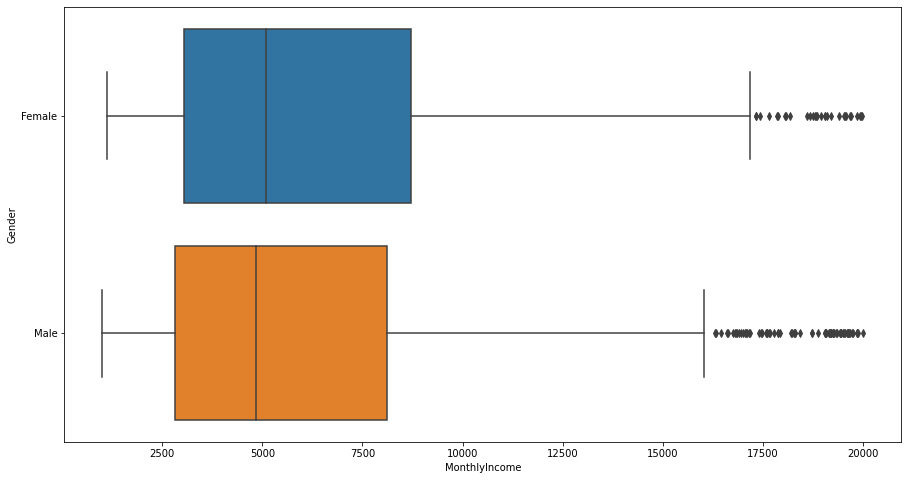

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=df_employee);



```
Para o gráfico acima, observamos que as mulheres ganham pouco mais que os homens.
```



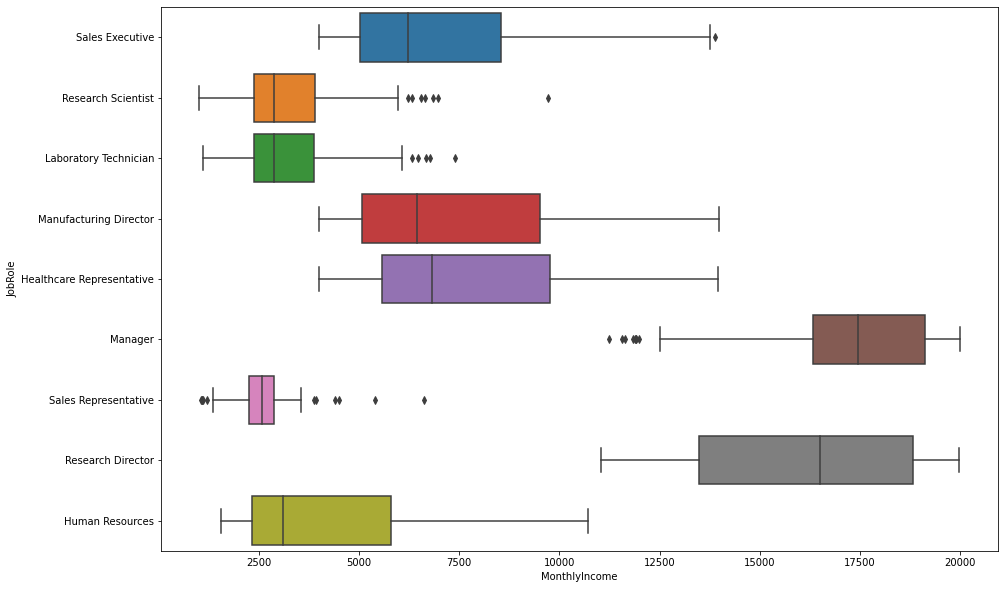

In [122]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=df_employee);



```
 Com o gráfico gerado acima, uma melhor análises pode ser executada por base nas profissões.
```



## Pré-processamento e bases de treimanto/teste

In [26]:
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [27]:
# Criando um DF temporário para armazenar os atributos categóricos e processá-los
dfX_cat = df_employee[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
dfX_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [28]:
# Criando atributos categóricos com o mesmo valor de peso
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
dfX_cat = onehotencoder.fit_transform(dfX_cat).toarray()

In [29]:
# A chamada abaixo é para confirmar que nossas colunas foram criadas
dfX_cat.shape

(1470, 26)

In [30]:
type(dfX_cat)

numpy.ndarray

In [31]:
# Passando o dfx_cata novamente para um DF
dfX_cat = pd.DataFrame(dfX_cat)
type(dfX_cat)

pandas.core.frame.DataFrame

In [32]:
dfX_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
dfX_numerical = df_employee[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
dfX_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [34]:
# Concatenando a união dos dois DF
dfX_all = pd.concat([dfX_cat, dfX_numerical], axis = 1)
dfX_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [35]:
# Importação para trabalho com pré-processamento
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(dfX_all)

In [36]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [37]:
y = df_employee['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [38]:
# Divisão da base de dados entre base de treinamento e base de testes
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(X, y, test_size = 0.25)

In [39]:
dfX_train.shape, dfy_train

((1102, 50), 483     0
 1059    0
 554     0
 964     0
 739     0
        ..
 709     1
 577     0
 699     0
 707     0
 1128    0
 Name: Attrition, Length: 1102, dtype: int64)

In [40]:
dfX_test.shape, dfy_test

((368, 50), 305     0
 488     0
 1230    0
 415     1
 203     0
        ..
 1411    0
 1242    0
 993     0
 562     1
 288     1
 Name: Attrition, Length: 368, dtype: int64)

## Regreção lógistica

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
# Confirmando a conclusão treinamento do algoritimo
logistic = LogisticRegression()
logistic.fit(dfX_train, dfy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# Criando a previsão
y_pred = logistic.predict(dfX_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
dfy_test

305     0
488     0
1230    0
415     1
203     0
       ..
1411    0
1242    0
993     0
562     1
288     1
Name: Attrition, Length: 368, dtype: int64

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(dfy_test, y_pred)

0.8668478260869565



```
Com a classificação acima, se houver uma necessidade de interpretar em uma kPI essa métrica, a empresa teria um 87% de
chance de acerta se este funcionário permaneceria ou não na empresa (conforme a base de dados montata para esta classificação).
Porém, temos de levar em consideração as outras métricas.
```



In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(dfy_test, y_pred)
cm

array([[300,   6],
       [ 43,  19]])

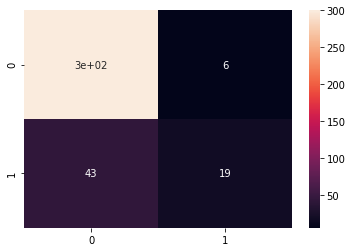

In [52]:
sns.heatmap(cm, annot=True);

In [53]:
# Precision
23 / (23 + 3)

0.8846153846153846

In [54]:
# Recall
23 / (23 + 43)

0.3484848484848485

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [56]:
precision_score(dfy_test, y_pred)

0.76

In [57]:
recall_score(dfy_test, y_pred)

0.3064516129032258

In [58]:
f1_score(dfy_test, y_pred, average='macro')

0.6806404193896889

In [60]:
print(classification_report(dfy_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       306
           1       0.76      0.31      0.44        62

    accuracy                           0.87       368
   macro avg       0.82      0.64      0.68       368
weighted avg       0.86      0.87      0.84       368



## Random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
# Criando o treinamneto (arvores)
forest = RandomForestClassifier()
forest.fit(dfX_train, dfy_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
y_pred = forest.predict(dfX_test)

In [65]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
accuracy_score(dfy_test, y_pred)

0.8478260869565217

In [67]:
cm = confusion_matrix(y_pred, dfy_test)
cm

array([[306,  56],
       [  0,   6]])

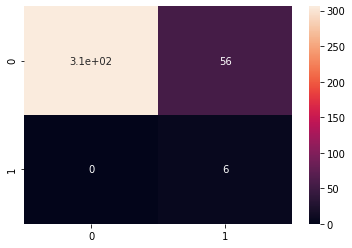

In [69]:
sns.heatmap(cm, annot=True);

In [70]:
print(classification_report(dfy_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       306
           1       1.00      0.10      0.18        62

    accuracy                           0.85       368
   macro avg       0.92      0.55      0.55       368
weighted avg       0.87      0.85      0.79       368



## Redes Neurais Artificiais

In [71]:
import tensorflow as tf

In [73]:
dfX_train.shape

(1102, 50)

In [74]:
(50 + 1) / 2

25.5

In [79]:
# Criando redes neurais
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu', input_shape = (50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [80]:
rede_neural.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 26        
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________




```
Com a estrutura acima, temos 2.601 pesos para fazer a atualziação
```



In [81]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
# Treinando a Rede Neural
rede_neural.fit(dfX_train, dfy_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 1ms/step - loss: 0.6135 - accuracy: 0.7069
Epoch 2/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8412
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8412
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8412
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8412
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8421
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8711
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8866
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8902
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8929
Epoch 11/

In [83]:
y_pred = rede_neural.predict(dfX_test)
y_pred

array([[5.19794331e-13],
       [1.99491573e-14],
       [9.61796615e-13],
       [1.20672584e-02],
       [7.96852708e-01],
       [4.18520334e-14],
       [1.48586147e-14],
       [1.15037459e-14],
       [4.40716212e-05],
       [1.08407016e-06],
       [1.17704078e-12],
       [1.22591496e-06],
       [2.04785272e-10],
       [9.69324172e-01],
       [2.08533675e-05],
       [1.46935872e-05],
       [2.58871310e-14],
       [9.99998927e-01],
       [1.22327648e-10],
       [7.32094049e-04],
       [8.24863804e-08],
       [7.23673139e-08],
       [2.27207106e-08],
       [6.36234390e-08],
       [1.00000000e+00],
       [1.63868560e-06],
       [1.14769072e-09],
       [8.70875592e-05],
       [2.60598103e-08],
       [8.91194820e-01],
       [9.99996901e-01],
       [1.00538503e-16],
       [1.16778894e-04],
       [6.17793062e-16],
       [3.39624748e-12],
       [1.92344361e-12],
       [4.05636462e-12],
       [1.00000000e+00],
       [4.01434426e-14],
       [2.21729451e-07],


In [84]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [85]:
# Gerando a Matriz de Confusão
cm = confusion_matrix(dfy_test, y_pred)
cm

array([[279,  27],
       [ 44,  18]])

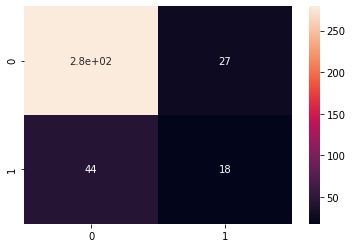

In [87]:
sns.heatmap(cm, annot=True);

In [88]:
print(classification_report(dfy_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       306
           1       0.40      0.29      0.34        62

    accuracy                           0.81       368
   macro avg       0.63      0.60      0.61       368
weighted avg       0.79      0.81      0.79       368



## Salvar o classificador

In [89]:
# Importação de biblioteca pandas para guardar variáveis
import pickle

In [91]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, logistic], f)



```
Acima fimanalizamos as análises cientificas sobre a pesquisa.
A partir da linha de código seguinte, é iniciado o frontEnd (parte programação)
```



In [93]:
with open('/content/variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [94]:
min_max, encoder, model

(MinMaxScaler(copy=True, feature_range=(0, 1)),
 OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
               handle_unknown='error', sparse=True),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False))

### Departamento RH classificando um novo funcionário

In [95]:
# Buscando o primeiro registro da base de dados original
Xdf_novo = df_employee.iloc[0:1]
Xdf_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5




```
O departamento de RH deseja saber se este funcionário tem chances ou não de sair da empresa, já na realização do contrato.
Em um propósito de negócio, esta visualição proporciona a chance de oferecer bonos para manter o funcionário na empresa.
```



#### Executando as transformações

In [105]:
Xcat_novo = Xdf_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
Xcat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [106]:
Xcat_novo = encoder.transform(Xcat_novo).toarray()
Xcat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [107]:
# Confirmando o formato Data Frame
Xcat_novo = pd.DataFrame(Xcat_novo)
Xcat_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [110]:
# Buscando os dados numericos
Xnumerical_novo = Xdf_novo[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
Xnumerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5


In [111]:
# Concatenando os DF
Xall_novo = pd.concat([Xcat_novo, Xnumerical_novo], axis = 1)
Xall_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5


In [112]:
# Colocando os dados na mesma escala
Xdf_novo = min_max.transform(Xall_novo)
Xdf_novo

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
        0.33333333, 0.91428571, 0.66666667, 0.25      , 1.        ,
        0.26245392, 0.6980526 , 0.88888889, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.15      , 0.22222222, 0.        , 0.29411765]])

In [113]:
# Buscando as característica do funcionário que sai da empresa
model.predict(Xdf_novo)

array([1])

In [114]:
# Indicando a probabilidade para uma melhor decisão pelo RH
model.predict_proba(Xdf_novo)

array([[0.39367731, 0.60632269]])

In [116]:
# Indicando os indices das classes
model.classes_

array([0, 1])

## Conclusão

O estudo aqui apresentado é em objetivo preditivo com relação a saída de funcionários de uma empresa.
Para tanto, é tomado a base IBM disponibilizada no Kaggle (dados fictícios).
Neste estudo de caso com base em ***negócios***, analiso dados dos funcionários em uma empresa, quais suas características (perfíl) de permanencia e de saída. A pretenção é prever qual o perfil dos usuários que maes saem, assim, auxiliando o departamento de Recursos Humanos na previsão destes funcionários, podendo expor propostas de bonus e melhorias para uma melhor posição na empresa, conforme seus desempenhos.
Também, é trabalhado a proposta de em uma eventual contratação e por meio das características deste novo funcionário, já ter uma previsão acertiva de se possui perfil dos que mais saem da empressa, podendo então, ofertar bonus na contratação para propor estimulos já em inicio de contrato.